# Explorando los datos

In [177]:
from pathlib import Path

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
sns.set_style("whitegrid")

In [179]:
data_dir = Path().resolve().parent / "data"
raw_dir = data_dir / "raw"

assert raw_dir.exists() & raw_dir.is_dir()

In [180]:
temp_dir = data_dir / "temp"
temp_dir.mkdir(exist_ok=True)

## EDA Agricultura

In [3]:
agricultira_dir = raw_dir / "agricultura"
agricultira_dir.mkdir(exist_ok=True)

In [5]:
for item in agricultira_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\raw\agricultura\agricultura-sonora-1999.xlsx
data\raw\agricultura\agricultura-sonora-2000.xlsx
data\raw\agricultura\agricultura-sonora-2001.xlsx
data\raw\agricultura\agricultura-sonora-2002.xlsx
data\raw\agricultura\agricultura-sonora-2003.xlsx
data\raw\agricultura\agricultura-sonora-2004.xlsx
data\raw\agricultura\agricultura-sonora-2005.xlsx
data\raw\agricultura\agricultura-sonora-2006.xlsx
data\raw\agricultura\agricultura-sonora-2007.xlsx
data\raw\agricultura\agricultura-sonora-2008.xlsx
data\raw\agricultura\agricultura-sonora-2009.xlsx
data\raw\agricultura\agricultura-sonora-2010.xlsx
data\raw\agricultura\agricultura-sonora-2011.xlsx
data\raw\agricultura\agricultura-sonora-2012.xlsx
data\raw\agricultura\agricultura-sonora-2013.xlsx
data\raw\agricultura\agricultura-sonora-2014.xlsx
data\raw\agricultura\agricultura-sonora-2015.xlsx
data\raw\agricultura\agricultura-sonora-2016.xlsx
data\raw\agricultura\agricultura-sonora-2017.xlsx
data\raw\agricultura\agricultura-sonora-2018.xlsx


### Catálogo

In [13]:
catalogo_path = agricultira_dir / "catalogo.xlsx"
assert catalogo_path.exists() & catalogo_path.is_file()

In [24]:
catalogo_xls = pd.ExcelFile(catalogo_path, )

In [25]:
catalogo_xls.sheet_names

['ClasificaciónCultivos',
 'CiclosCultivos',
 'Distritos',
 'Municipios',
 'Regiones']

#### Cultivos

In [92]:
cultivos = pd.read_excel(catalogo_path, sheet_name='ClasificaciónCultivos')
cultivos.columns = cultivos.columns.str.lower()
cultivos.head()

,ccilo,cultivo,descrip,fotos,tipo
0,3,901,Aceituna,Frutales,27
1,1,1,Acelga,Hortalizas,9
2,2,1,Acelga,Hortalizas,9
3,3,902,Agave,Otros,30
4,3,903,Aguacate,Frutales,21


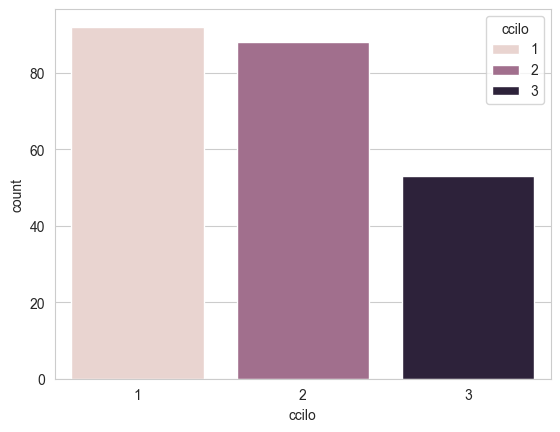

In [93]:
sns.countplot(
    data=cultivos, 
    x='ccilo', 
    hue='ccilo'
)
plt.show()

In [94]:
desccount = cultivos.descrip.value_counts().reset_index()
desccount[:10]


,descrip,count
0,Zacate,3
1,Varios,3
2,Rye grass en verde,3
3,Pastos y praderas en verde,3
4,Litchi,3
5,Ajonjolí,2
6,Acelga,2
7,Avena grano,2
8,Berenjena,2
9,Avena forrajera en verde,2


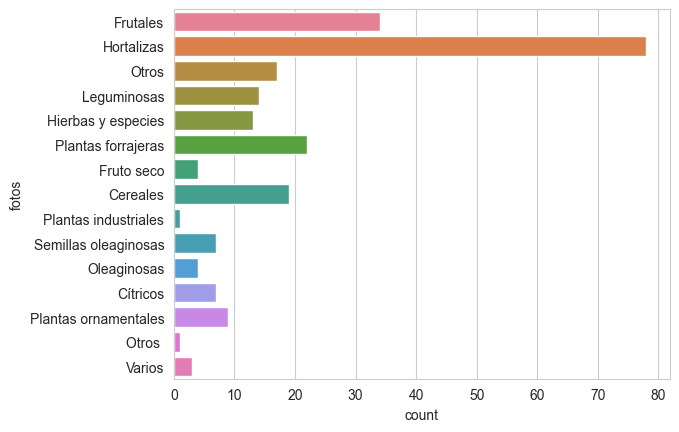

In [95]:
sns.countplot(
    data=cultivos, 
    y='fotos', 
    hue='fotos'
)
plt.show()

#### Cliclos

In [96]:
ciclos = pd.read_excel(catalogo_path, sheet_name='CiclosCultivos')
ciclos

,cvecic,decic
0,1,OTOÑO-INVIERNO
1,2,PRIMAVERA-VERANO
2,3,PERENNES


#### Distritos

In [97]:
distritos = pd.read_excel(catalogo_path, sheet_name='Distritos')
distritos

,DDR,DISTRITOS
0,139,DDR 139 CABORCA
1,140,DDR 140 MAGDALENA
2,141,DDR 141 AGUA PRIETA
3,142,DDR 142 URES
4,143,DDR 143 MOCTEZUMA
5,144,DDR 144 HERMOSILLO
6,145,DDR 145 MAZATÁN
7,146,DDR 146 SAHUARIPA
8,147,DDR 147 GUAYMAS
9,148,DDR 148 CAJEME


#### Municipios

In [98]:
mpios = pd.read_excel(catalogo_path, sheet_name='Municipios')
mpios

,MUNI,MUNICIPIOS,ddr,region
0,70,GENERAL PLUTARCO ELÍAS CALLES,139,1
1,4,ALTAR,139,5
2,19,CANANEA,141,3
3,17,CABORCA,139,5
4,7,ATIL,139,5
...,...,...,...,...
67,49,QUIRIEGO,148,7
68,26,ETCHOJOA,149,7
69,42,NAVOJOA,149,7
70,33,HUATABAMPO,149,7


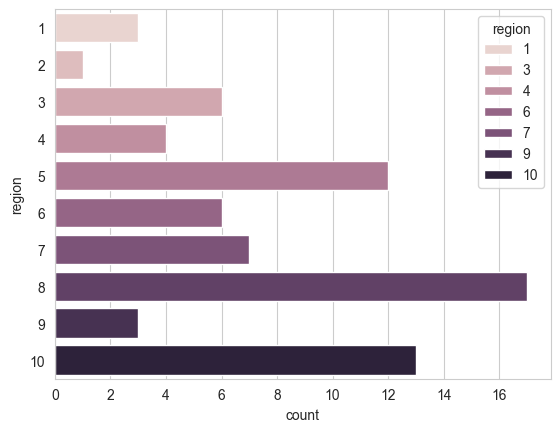

In [99]:
sns.countplot(
    data=mpios, 
    y='region', 
    hue='region'
)
plt.show()

#### Regiones

In [100]:
regs = pd.read_excel(catalogo_path, sheet_name='Regiones')
regs 

,REGION,CVE-REGION
0,Alto Golfo,1
1,Capital,2
2,Cuatro Sierras,3
3,Frontera,4
4,Gran Desierto,5
5,Puerto,6
6,Río Mayo,7
7,Río Sonora,8
8,Río Yaqui,9
9,Sierra Alta,10


### Integración

In [101]:
ccilos = {1: 'OTOÑO-INVIERNO', 2: 'PRIMAVERA-VERANO', 3: 'PERENNES'}
ccilos

{1: 'OTOÑO-INVIERNO', 2: 'PRIMAVERA-VERANO', 3: 'PERENNES'}

In [102]:
cultivos['ccilo'] = (
    cultivos['ccilo']
    .map(ccilos)
)
cultivos.head()

,ccilo,cultivo,descrip,fotos,tipo
0,PERENNES,901,Aceituna,Frutales,27
1,OTOÑO-INVIERNO,1,Acelga,Hortalizas,9
2,PRIMAVERA-VERANO,1,Acelga,Hortalizas,9
3,PERENNES,902,Agave,Otros,30
4,PERENNES,903,Aguacate,Frutales,21


In [119]:
cultivos = cultivos.map(lambda x: x.lower() if isinstance(x, str) else x)

Guardamos los datos procesados en el directorio temporal: 

In [120]:
cultivos.to_csv(temp_dir / "cultivos_processed.csv")

In [103]:
def df_todict(df, col1, col2): 
    return df.set_index(col1)[col2].to_dict()

In [104]:
distritos_dict = df_todict(distritos, 'DDR', 'DISTRITOS')
distritos_dict

{139: 'DDR 139 CABORCA',
 140: 'DDR 140 MAGDALENA',
 141: 'DDR 141 AGUA PRIETA',
 142: 'DDR 142 URES',
 143: 'DDR 143  MOCTEZUMA',
 144: 'DDR 144 HERMOSILLO',
 145: 'DDR 145 MAZATÁN',
 146: 'DDR 146 SAHUARIPA',
 147: 'DDR 147 GUAYMAS',
 148: 'DDR 148 CAJEME',
 149: 'DDR 149 NAVOJOA',
 193: 'DDR 193 SAN LUIS RÍO COLORADO'}

In [105]:
mpios['ddr'] = (
    mpios['ddr']
    .map(distritos_dict)
)
mpios.head(); 

In [106]:
regs_dict = df_todict(regs, 'CVE-REGION', 'REGION')
regs_dict

{1: 'Alto Golfo',
 2: 'Capital',
 3: 'Cuatro Sierras',
 4: 'Frontera',
 5: 'Gran Desierto',
 6: 'Puerto',
 7: 'Río Mayo',
 8: 'Río Sonora',
 9: 'Río Yaqui',
 10: 'Sierra Alta'}

In [107]:
mpios['region'] = (
    mpios['region']
    .map(regs_dict)
)
mpios.head()

,MUNI,MUNICIPIOS,ddr,region
0,70,GENERAL PLUTARCO ELÍAS CALLES,DDR 139 CABORCA,Alto Golfo
1,4,ALTAR,DDR 139 CABORCA,Gran Desierto
2,19,CANANEA,DDR 141 AGUA PRIETA,Cuatro Sierras
3,17,CABORCA,DDR 139 CABORCA,Gran Desierto
4,7,ATIL,DDR 139 CABORCA,Gran Desierto


In [109]:
mpios.columns = mpios.columns.str.lower()

In [111]:
mpios['ddr'] = mpios.ddr.str.replace('DDR ', '')

In [115]:
mpios = mpios.map(lambda x: x.lower() if isinstance(x, str) else x)

In [116]:
mpios.head()

,muni,municipios,ddr,region
0,70,general plutarco elías calles,139 caborca,alto golfo
1,4,altar,139 caborca,gran desierto
2,19,cananea,141 agua prieta,cuatro sierras
3,17,caborca,139 caborca,gran desierto
4,7,atil,139 caborca,gran desierto


Guardamos los archivos procesados en el directorio temporal: 

In [117]:
mpios.to_csv(temp_dir / "mpios_processed.csv")

### Datos

In [121]:
filename_template = "agricultura-sonora-*.xlsx"

data_paths = list(agricultira_dir.glob(filename_template))
data_paths;

In [135]:
[pd.ExcelFile(path).sheet_names for path in data_paths]; 

Todas las *sheets* poseen un solo elemento llamado `Hoja1`. 

In [136]:
dfs = list(pd.read_excel(path, sheet_name='Hoja1') for path in data_paths)

Concatenamos los *dataframes*: 

In [141]:
agricultura = pd.concat(dfs)
agricultura.head()

,ANO,CIERREYAVAN,CICLO,CDDR,NDDR,CMUN,NMUN,CVECUL,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,RENDMNTO,PMR,VALPROD
0,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,AGUA PRIETA,2,Ajo,75.0,75.0,0.0,525.0,7.00,6948.6,3648.02
1,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,AGUA PRIETA,4,Avena forrajera en verde,503.0,503.0,0.0,2130.0,4.24,1000.0,2130.00
2,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,AGUA PRIETA,11,Cebada forrajera en verde,635.0,635.0,0.0,2553.0,4.02,1100.0,2808.30
3,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,AGUA PRIETA,44,Rye grass en verde,345.0,345.0,0.0,10350.0,30.00,900.0,9315.00
4,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,AGUA PRIETA,51,Trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80


In [142]:
agricultura.columns = agricultura.columns.str.lower()

In [144]:
agricultura = agricultura.map(lambda x: x.lower() if isinstance(x, str) else x)
agricultura.head()

,ano,cierreyavan,ciclo,cddr,nddr,cmun,nmun,cvecul,cultivo,supsem,supcose,supsini,prodton,rendmnto,pmr,valprod
0,1999,cierre de produccion agricola 1999,1,141,ddr 141 agua prieta,2,agua prieta,2,ajo,75.0,75.0,0.0,525.0,7.00,6948.6,3648.02
1,1999,cierre de produccion agricola 1999,1,141,ddr 141 agua prieta,2,agua prieta,4,avena forrajera en verde,503.0,503.0,0.0,2130.0,4.24,1000.0,2130.00
2,1999,cierre de produccion agricola 1999,1,141,ddr 141 agua prieta,2,agua prieta,11,cebada forrajera en verde,635.0,635.0,0.0,2553.0,4.02,1100.0,2808.30
3,1999,cierre de produccion agricola 1999,1,141,ddr 141 agua prieta,2,agua prieta,44,rye grass en verde,345.0,345.0,0.0,10350.0,30.00,900.0,9315.00
4,1999,cierre de produccion agricola 1999,1,141,ddr 141 agua prieta,2,agua prieta,51,trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80


In [145]:
columns_map = {
    "ano": "anio",
    "cierreyavan": "tipo_registro",            # cierre / avance
    "ciclo": "ciclo_productivo",
    "cddr": "clave_ddr",
    "nddr": "distrito_ddr",
    "cmun": "clave_municipio",
    "nmun": "municipio",
    "cvecul": "clave_cultivo",
    "cultivo": "cultivo",
    "supsem": "superficie_sembrada_ha",
    "supcose": "superficie_cosechada_ha",
    "supsini": "superficie_siniestrada_ha",
    "prodton": "produccion_ton",
    "rendmnto": "rendimiento_ton_ha",
    "pmr": "precio_medio_rural",
    "valprod": "valor_produccion_miles_mxn"
}


In [147]:
agricultura = agricultura.rename(columns=columns_map)

In [149]:
agricultura['distrito_ddr'] = agricultura['distrito_ddr'].str.replace('ddr ', '')

In [150]:
agricultura.head()

,anio,tipo_registro,ciclo_productivo,clave_ddr,distrito_ddr,clave_municipio,municipio,clave_cultivo,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
0,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,2,ajo,75.0,75.0,0.0,525.0,7.00,6948.6,3648.02
1,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,4,avena forrajera en verde,503.0,503.0,0.0,2130.0,4.24,1000.0,2130.00
2,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,11,cebada forrajera en verde,635.0,635.0,0.0,2553.0,4.02,1100.0,2808.30
3,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,44,rye grass en verde,345.0,345.0,0.0,10350.0,30.00,900.0,9315.00
4,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,51,trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80


Guardamos los datos en el directorio temporal: 

In [151]:
agricultura.to_csv(temp_dir / "agricultura_processed.csv")

## EDA Recursos Hídricos

In [152]:
hidricos_dir = raw_dir / "hidricos"
hidricos_dir.mkdir(exist_ok=True)

In [153]:
for item in hidricos_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\raw\hidricos\catalogo.xlsx
data\raw\hidricos\diccionario_hidrica_sonora.csv
data\raw\hidricos\hidrico_sonora_1941-1949.xlsx
data\raw\hidricos\hidrico_sonora_1950-1959.xlsx
data\raw\hidricos\hidrico_sonora_1970-1979.xlsx
data\raw\hidricos\hidrico_sonora_1980-1989.xlsx
data\raw\hidricos\hidrico_sonora_1990-1999.xlsx
data\raw\hidricos\hidrico_sonora_2000-2009.xlsx
data\raw\hidricos\hidrico_sonora_2010-2019.xlsx
data\raw\hidricos\hidrico_sonora_2020-actualidad2024.xlsx
data\raw\hidricos\~$catalogo.xlsx


### Catálogo

In [157]:
catalogo_path = hidricos_dir / "catalogo.xlsx"
assert catalogo_path.exists() & catalogo_path.is_file()

In [158]:
catalogo_xls = pd.ExcelFile(catalogo_path, )
catalogo_xls.sheet_names

['Catálogo_estatal', 'Municipios', 'Regiones']

Las *sheets* `{Municipios, Regiones}` poseen la misma información que el el catálogo en los datos de agriculuta. Omitimos su exploración. 

El *sheet* `Catálogo_estatal` posee información sobre las presas en Sonora. 

In [160]:
presas = pd.read_excel(catalogo_path, sheet_name='Catálogo_estatal')
presas

,Clave,Comision,Subdireccion,Presa,Nombre_comun,Estado,Municipio,cap_name,cap_namo,vol_muerto,Río,Numero,Latitud,Longitud,Altitud,Identificador_cuenca_disponibilidad,Cuenca de disponibilidad,Numero_region_hidrologica,Region_hidrológica
0,LCDSO,Comisión Nacional del Agua,Subdirección General Técnica,Lázaro Cárdenas,La Angostura,Sonora,Nacozari de García,1116,703,10,Río Yaqui,181,30,-109,860,102,Río Bavispe,9,Sur
1,PECSO,Comisión Nacional del Agua,Subdirección General Técnica,Plutarco Elías Calles,El Novillo,Sonora,Soyopa,3312,2833,200,Río Yaqui,182,29,-110,2110,103,Río Yaqui 1,9,Sur
2,AOBSO,Comisión Nacional del Agua,Subdirección General Técnica,Álvaro Obregón,Oviachic,Sonora,Cajeme,4409,3023,23,Río Yaqui,177,28,-110,116,104,Río Yaqui 2,9,Sur
3,AGZCH,Comisión Nacional del Agua,Subdirección General Técnica,Abraham González,Guadalupe,Chihuahua,Guerrero,103,79,2,Otros,25,28,-107,2020,103,Río Yaqui 1,9,Sur
4,ARCSO,Comisión Nacional del Agua,Subdirección General Técnica,Adolfo Ruiz Cortines,Mocúzari,Sonora,Alamos,1823,1200,8,Río Mayo,175,27,-109,148,108,Río Mayo 2,9,Sur
5,PMOSO,Comisión Nacional del Agua,Subdirección General Técnica,Ing. Rodolfo Félix Valdés,El Molinito,Sonora,Hermosillo,222,121,15,Río Sonora,180,29,-111,321,100,Río Sonora 2,9,Sur
6,ARLSO,Comisión Nacional del Agua,Subdirección General Técnica,Abelardo Rodríguez Luján,Hermosillo,Sonora,Hermosillo,284,220,2,Río Sonora,179,29,-111,230,100,Río Sonora 2,9,Sur
7,CHTSO,Comisión Nacional del Agua,Subdirección General Técnica,Cuauhtémoc,Santa Teresa,Sonora,Tubutama,66,42,2,Otros,183,31,-112,590,92,Río Magdalena,8,Norte
8,IRASO,Comisión Nacional del Agua,Subdirección General Técnica,Ignacio R. Alatorre,Punta de Agua,Sonora,Guaymas,30,16,0,Otros,178,28,-110,245,110,Río Mátape,9,Sur
9,BICSO,Comisión Nacional del Agua,Subdirección General Técnica,Bicentenario,Los Pilares,Sonora,Álamos,466,393,0,Río Mayo,0,27,-109,164,108,Río Mayo,9,Sur


El diccionario de datos no posee información sobre las columnas. 

In [162]:
presas.columns = presas.columns.str.lower()
presas = presas.map(lambda x: x.lower() if isinstance(x, str) else x)
presas; 

Guardamos los datos en el directorio temporal: 

In [ ]:
presas.to_csv(temp_dir / "presas_processed.csv")

### Datos

In [156]:
filename_template = "hidrico_sonora_*.xlsx"

data_paths = list(hidricos_dir.glob(filename_template))
data_paths;

Todas las *sheets* poseen un solo elemento llamado `Hoja1`.

In [165]:
dfs = list(pd.read_excel(path, sheet_name='Hoja1') for path in data_paths)

Concatenamos los *dataframes*: 

In [166]:
hidricos = pd.concat(dfs)
hidricos.head()

,Clave,Fecha,Almacenamiento(hmÂ³)
0,LCDSO,1941/07/01,0.13
1,CHTSO,1941/07/01,-
2,CHTSO,1941/07/02,-
3,LCDSO,1941/07/02,0.15
4,LCDSO,1941/07/03,0.16


Renombramos columnas: 

In [173]:
hidricos.columns = ['clave', 'fecha', 'almacenamiento_hm3']

La columna `Clave` identidica la presa. 

In [ ]:
hidricos['clave'] = hidricos.clave.str.lopwer()

In [175]:
hidricos.head()

,clave,fecha,almacenamiento_hm3
0,lcdso,1941/07/01,0.13
1,chtso,1941/07/01,-
2,chtso,1941/07/02,-
3,lcdso,1941/07/02,0.15
4,lcdso,1941/07/03,0.16


Guardamos los datos en el directorio temporal: 

In [176]:
hidricos.to_csv(temp_dir / "hidricos_processed.csv")

## Poligonos

In [181]:
mpios_dir = raw_dir / "mpios"

for item in mpios_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\raw\mpios\26_sonora
data\raw\mpios\26_sonora.zip


Verificamos los archivos *shapefile*: 

In [183]:
for item in mpios_dir.rglob("*.shp"): 
    print(item.relative_to(data_dir.parent))

data\raw\mpios\26_sonora\conjunto_de_datos\26a.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26ar.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26cd.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26e.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26ent.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26fm.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26l.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26lpr.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26m.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26mun.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26pe.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26pem.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26sia.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26sil.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26sip.shp
data\raw\mpios\26_sonora\conjunto_de_datos\26ti.shp


Según el [*readme* del catálogo](../data/raw/mpios/26_sonora/catalogos/contenido.pdf) el archivo con las geometrías los municpios de Sonora es el que posee termianción `mun`, en este caso: `26mun.shp`. 

In [184]:
mpios_shp = mpios_dir / "26_sonora" / "conjunto_de_datos" / "26mun.shp"

assert mpios_shp.exists() & mpios_shp.is_file()

In [186]:
gdf = gpd.read_file(mpios_shp)
gdf.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,26066,26,066,Ures,"POLYGON ((1693965.537 1982974.771, 1694347.245..."
1,26038,26,038,Moctezuma,"POLYGON ((1772943.799 2007689.216, 1772836.319..."
2,26033,26,033,Huatabampo,"POLYGON ((1723403.366 1671857.06, 1724208.718 ..."
3,26056,26,056,San Miguel de Horcasitas,"POLYGON ((1652027.958 1980399.236, 1649666.151..."
4,26031,26,031,Huachinera,"POLYGON ((1816027.742 2046529.007, 1816847.8 2..."


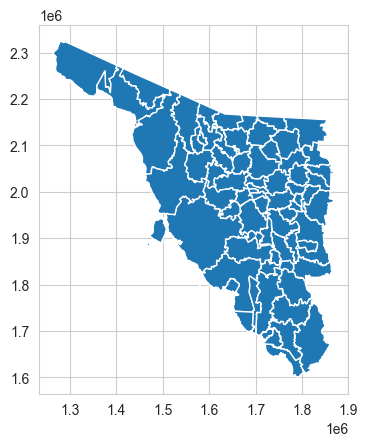

In [188]:
gdf.plot()
plt.show()